In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import ast

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/Users/kimsoryun/Downloads/폰트/kakao_fonts/KakaoRegular.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [2]:
df = pd.read_csv('naver_shopping_tokenized1245.csv')

In [3]:
df

,ratings,reviews,label,tokenized
0,5,배공빠르고 굿,1,"['배공', '빠르고', '굿']"
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0,"['택배', '엉망', '밑', '층', '놔두고가고']"
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1,"['좋아요', '바지', '좋아서', '구매', '가격', '대박', '바느질', ..."
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0,"['선물', '빨리', '받아서', '전달', '했어야', '상품', '이었는데',..."
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,"['민트', '색상', '예뻐요', '옆', '손잡이', '도로', '사용', '되..."
...,...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0,"['장마', '런가', '!!!']"
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1,"['다이슨', '케이스', '구매', '다이슨', '슈퍼소닉', '드라이기', '케..."
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1,"['로드샾', '사는것보다', '세배', '저렴하네요', '자주', '용할께요']"
199998,5,넘이쁘고 쎄련되보이네요~,1,"['이쁘고', '쎄련', '보이네요']"


In [4]:
# 문자열을 리스트로 변환
df['tokenized'] = df['tokenized'].apply(ast.literal_eval)

In [5]:
df['tokenized']

0                                              [배공, 빠르고, 굿]
1                                     [택배, 엉망, 밑, 층, 놔두고가고]
2         [좋아요, 바지, 좋아서, 구매, 가격, 대박, 바느질, 엉, 성하긴, 편하고, 가...
3         [선물, 빨리, 받아서, 전달, 했어야, 상품, 이었는데, 머그컵, 당황, 전화했더...
4                        [민트, 색상, 예뻐요, 옆, 손잡이, 도로, 사용, 되네요]
                                ...                        
199995                                        [장마, 런가, !!!]
199996    [다이슨, 케이스, 구매, 다이슨, 슈퍼소닉, 드라이기, 케이스, 구매, 가격, 괜...
199997                    [로드샾, 사는것보다, 세배, 저렴하네요, 자주, 용할께요]
199998                                      [이쁘고, 쎄련, 보이네요]
199999            [사용, 해보지도, 않았고, 제품, 본적, 모르겠지만, 배송, 빨랐습니다]
Name: tokenized, Length: 200000, dtype: object

In [6]:
# 텍스트 파일에서 불용어 읽어오기
with open('updated_stop_words.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [7]:
df['tokenized']

0                                              [배공, 빠르고, 굿]
1                                     [택배, 엉망, 밑, 층, 놔두고가고]
2         [좋아요, 바지, 좋아서, 구매, 가격, 대박, 바느질, 엉, 성하긴, 편하고, 가...
3         [선물, 빨리, 받아서, 전달, 했어야, 상품, 이었는데, 머그컵, 당황, 전화했더...
4                        [민트, 색상, 예뻐요, 옆, 손잡이, 도로, 사용, 되네요]
                                ...                        
199995                                        [장마, 런가, !!!]
199996    [다이슨, 케이스, 구매, 다이슨, 슈퍼소닉, 드라이기, 케이스, 구매, 가격, 괜...
199997                    [로드샾, 사는것보다, 세배, 저렴하네요, 자주, 용할께요]
199998                                      [이쁘고, 쎄련, 보이네요]
199999            [사용, 해보지도, 않았고, 제품, 본적, 모르겠지만, 배송, 빨랐습니다]
Name: tokenized, Length: 200000, dtype: object

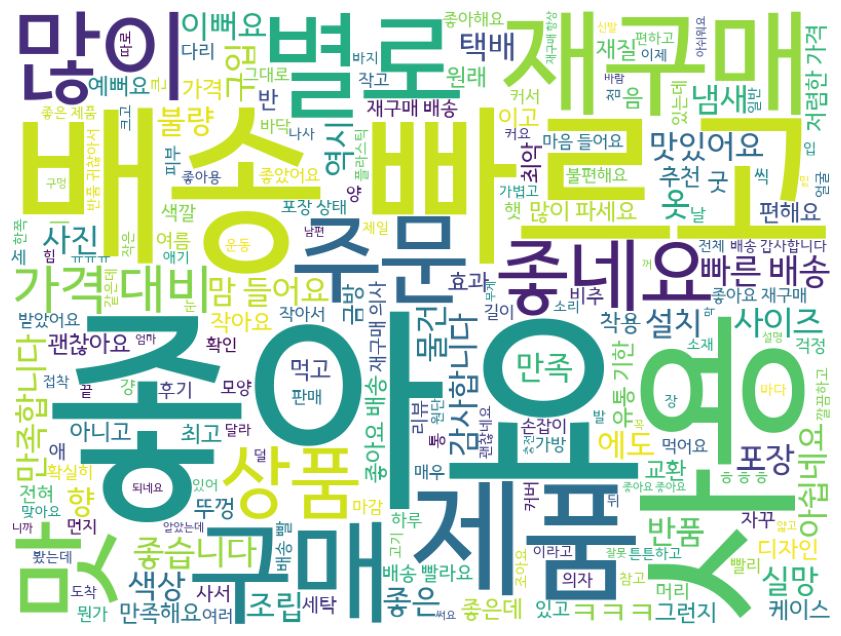

In [8]:
all_words = [word for tokens in df['tokenized'] for word in tokens]
all_text = " ".join(all_words)
wordcloud = WordCloud(font_path=fontpath,
                      relative_scaling=0.2,
                      background_color='white',
                      width=800, height=600).generate(all_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [9]:
# 레이블에 따라 데이터 분리
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

In [10]:
df_label_0

,ratings,reviews,label,tokenized
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0,"[택배, 엉망, 밑, 층, 놔두고가고]"
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0,"[선물, 빨리, 받아서, 전달, 했어야, 상품, 이었는데, 머그컵, 당황, 전화했더..."
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,0,"[비추, 계란, 뒤집을, 불편해요, 코팅, 묻어나고, 보기, 예쁘고, 실용, 보였는..."
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0,"[주문, 11월, 11월, 16일, 배송, ㅎㅎㅎ, 회사, 측, 과는, 전화, 안되..."
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,0,"[넉넉한, 길이, 주문, 했는데도, 맞네요, 별로]"
...,...,...,...,...
199980,2,품절품절 ㅡㅡ,0,"[품절, 품절]"
199985,1,별로에요 진짜 ㅠ 너무하네,0,"[별로, 너무하네]"
199987,2,꽃이3송이였는데 똑..부러졌더라구요ㅠ 선물한거라서..교환이어려워요ㅠ,0,"[꽃, 송이, 였는데, 똑, 부러졌더라구요, 선물, 교환, 어려워요]"
199989,1,올때 박스하나가.입구부분이뜯어져서왔어요 다음엔 안사려고요...,0,"[올, 입구, 뜯어져서, 사려고요]"


In [11]:
df_label_1

,ratings,reviews,label,tokenized
0,5,배공빠르고 굿,1,"[배공, 빠르고, 굿]"
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1,"[좋아요, 바지, 좋아서, 구매, 가격, 대박, 바느질, 엉, 성하긴, 편하고, 가..."
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,"[민트, 색상, 예뻐요, 옆, 손잡이, 도로, 사용, 되네요]"
10,5,사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ,1,"[사이즈, 딱이고, 귀엽고, 좋아요]"
14,5,촉감도 좋고 무게감이나 핏도 편합니다,1,"[촉감, 좋고, 무게, 핏, 편합니다]"
...,...,...,...,...
199994,4,전반적으로 어플이나 각종 IOT서비스와의 완성도는 좋음 그러나 서버의 잦은 다운과 ...,1,"[전반, 어플, IOT, 서비스, 와의, 완성, 좋음, 서버, 잦은, 다운, 서버,..."
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1,"[다이슨, 케이스, 구매, 다이슨, 슈퍼소닉, 드라이기, 케이스, 구매, 가격, 괜..."
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1,"[로드샾, 사는것보다, 세배, 저렴하네요, 자주, 용할께요]"
199998,5,넘이쁘고 쎄련되보이네요~,1,"[이쁘고, 쎄련, 보이네요]"


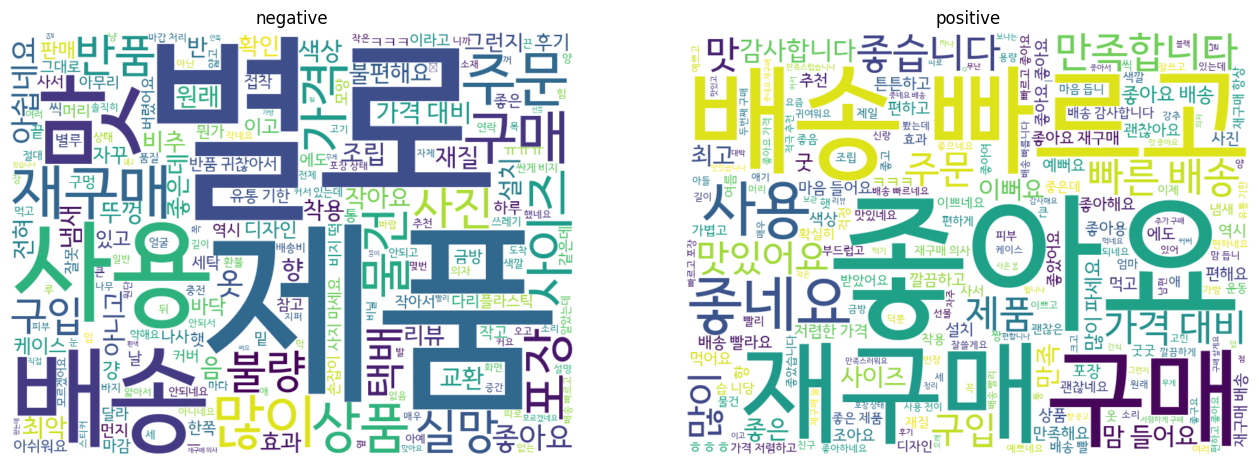

In [12]:
label_0_words = [word for tokens in df_label_0['tokenized'] for word in tokens]
label_0_text = " ".join(label_0_words)
wordcloud_0 = WordCloud(font_path=fontpath,
                      relative_scaling=0.2,
                      background_color='white',
                      width=800, height=600).generate(label_0_text)

label_1_words = [word for tokens in df_label_1['tokenized'] for word in tokens]
label_1_text = " ".join(label_1_words)
wordcloud_1 = WordCloud(font_path=fontpath,
                      relative_scaling=0.2,
                      background_color='white',
                      width=800, height=600).generate(label_1_text)

# 워드 클라우드 시각화
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('negative')
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('positive')
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')

plt.show()

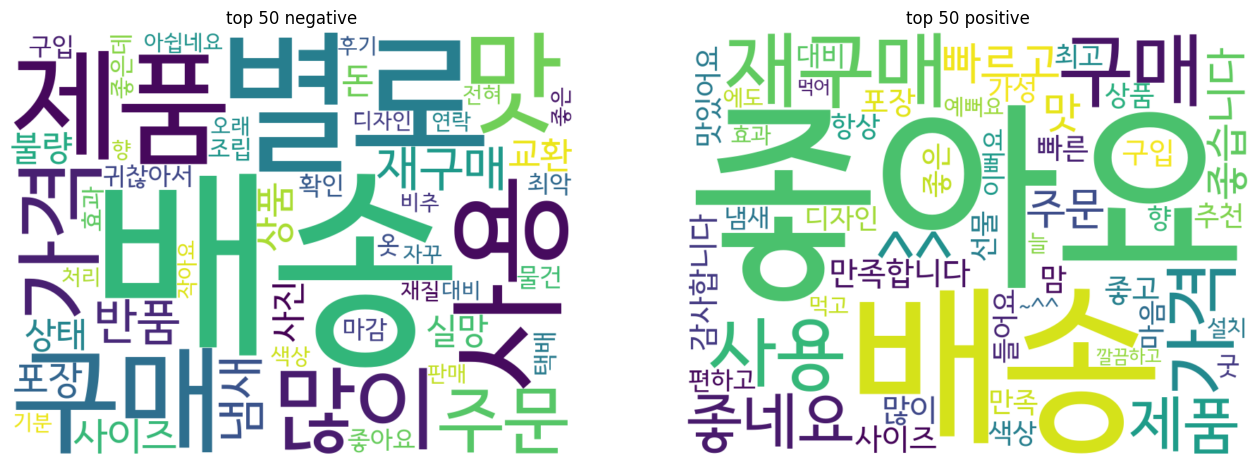

In [13]:
from collections import Counter

# label 0 (부정 리뷰)에 대한 상위 50개 빈도의 단어 추출
label_0_words = [word for tokens in df_label_0['tokenized'] for word in tokens]
label_0_word_freq = Counter(label_0_words)
label_0_top_50_words = dict(label_0_word_freq.most_common(50))

# label 1 (긍정 리뷰)에 대한 상위 50개 빈도의 단어 추출
label_1_words = [word for tokens in df_label_1['tokenized'] for word in tokens]
label_1_word_freq = Counter(label_1_words)
label_1_top_50_words = dict(label_1_word_freq.most_common(50))

# 상위 50개 단어로 워드클라우드 생성
wordcloud_0_top_50 = WordCloud(font_path=fontpath,
                      relative_scaling=0.2,
                      background_color='white',
                      width=800, height=600).generate_from_frequencies(label_0_top_50_words)
                      
wordcloud_1_top_50 = WordCloud(font_path=fontpath,
                      relative_scaling=0.2,
                      background_color='white',
                      width=800, height=600).generate_from_frequencies(label_1_top_50_words)


# 워드 클라우드 시각화
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title(('top 50 negative'))
plt.imshow(wordcloud_0_top_50, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('top 50 positive')
plt.imshow(wordcloud_1_top_50, interpolation='bilinear')
plt.axis('off')

plt.show()